## Dog Vs Cat: A CNN based Dog/Cat Classifer 

# enviroment setup

In [2]:
import numpy as np
import os
import glob
import cv2
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 5.0)

TRAIN_DATA_PATH_LIST = ["./train"]
TEST_DATA_PATH_LIST = ["./test"]

# load and processing data

In [38]:
def load_data(DATA_PATH):
    labels = ["dog", "cat"]
    labeled_data = {}
    for dir in DATA_PATH: 
        print("processing data from: " + dir)
        for key in labels:           
            labeled_data[key] = [file for file in glob.glob(os.path.join(dir, key + '*.jpg'))]
            print("total " + str(len(labeled_data[key])) + " " + key + " images found.")
        
    return labeled_data


def raw_data_analysis(data):
    image_size_counter = {}    
    dimension_shape = ["height", "width"]
    for key in data.keys():
        print("processing: " + key)
        image_size_counter[key] = {}
        for i in range(len(dimension_shape)):
            print(dimension_shape[i])
            image_size_counter[key][dimension_shape[i]] = Counter()            
            for img_path in data[key]:
                img = cv2.imread(img_path)            
                image_size_counter[key][dimension_shape[i]][img.shape[i]] += 1
                #image_size_counter[key][dimension_shape[0]][img.shape[1]] += 1
        
            print("most common " + key + " image " + dimension_shape[i] + ": " , image_size_counter[key][dimension_shape[i]].most_common(10))
        
        #for dim in dimension_shape:
        #    print("most common " + key + " image " + dim + ": " , image_size_counter[key][dim].most_common(10))    
        #print("most common " + key + " image width: ", image_size_counter[key]["width"].most_common(10))
        #print("most common " + key + " image height: ", image_size_counter[key]["height"].most_common(10))
    
    return image_size_counter
        
    

data = load_data(TRAIN_DATA_PATH_LIST)


temp_counter_dict = raw_data_analysis(data)
    



processing data from: ./train
total 12500 dog images found.
total 12500 cat images found.
processing: dog
height
most common dog image height:  [(374, 1400), (375, 1345), (500, 1040), (499, 993), (332, 153), (333, 152), (399, 150), (299, 130), (240, 123), (300, 122)]
width
most common dog image width:  [(500, 2486), (499, 2398), (350, 197), (400, 194), (399, 175), (375, 174), (299, 162), (319, 160), (320, 155), (300, 146)]
processing: cat
height
most common cat image height:  [(374, 1684), (375, 1614), (499, 846), (500, 804), (333, 166), (332, 155), (239, 149), (240, 130), (299, 108), (359, 89)]
width
most common cat image width:  [(499, 2914), (500, 2859), (349, 188), (300, 181), (350, 175), (319, 165), (320, 164), (299, 149), (399, 149), (400, 142)]


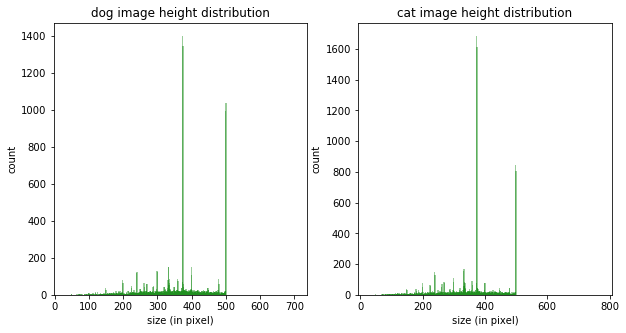

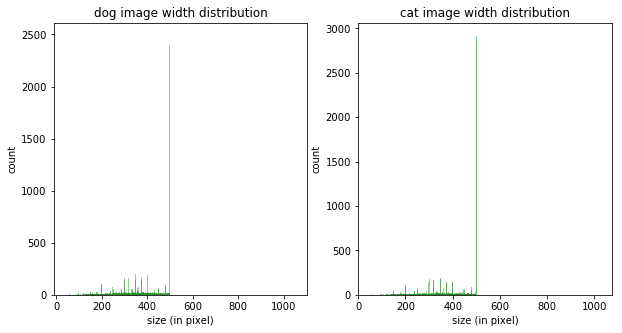

In [48]:
#data_label_list = list(temp_counter_dict.keys())
#dimension_list = list(temp_counter_dict[data_label_list[0]].keys())

        
def visualize_image_size_distribution(counter_dict):
    data_label_list = list(counter_dict.keys())
    dimension_list =   list(counter_dict[data_label_list[0]].keys())   
    for dimension in dimension_list:    
        f, ax = plt.subplots(1, 2)
        for i in range(len(data_label_list)):
            x = sorted(counter_dict[data_label_list[i]][dimension].keys())
            y = [counter_dict[data_label_list[i]][dimension][j] for j in x]
            ax[i].bar(x, y, width = 4, align='center', color= "green", alpha=0.4)            
            ax[i].set_title(data_label_list[i] + " image " + dimension + " distribution")
            ax[i].set_xlabel("size (in pixel)")
            ax[i].set_ylabel("count")
        plt.show()
        
    
            

visualize_image_size_distribution(temp_counter_dict)

    
 
    

# resize all training image to the same size

In [ ]:
def sample_generator(samples, batch_size=1000):
    num_samples = len(samples)
    